In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pdb
import pickle
from scipy import stats
import math
import seaborn as sns
import vectorized_RG as RG
from ipywidgets import interact
from IPython.core.display import display, HTML
import winsound

### Debugging
pdb.set_trace() debugging mode will be entered when a worm has negative energy
1. "n" ENTER runs the next line in the program
2. "q" ENTER quits/crashes the program
3. "p" (variable) ENTER prints out the variable
4. "c" ENTER continues running the program

[Debugging in Python](https://pythonconquerstheuniverse.wordpress.com/2009/09/10/debugging-in-python/)

### Code Timer
%load_ext line_profiler

%lprun -f run run(1)

In [2]:
cd "D:/experiments/test_run_4/"

D:\experiments\test_run_4


set the working directory

In [3]:
#time_saved = [1,250,500,1000,1500,2000,5000,10000,20000,30000]
time_saved = [1,250,500]

In [4]:
my_data = [RG.open_pickle(i) for i in time_saved]

In [5]:
def worm_map(time=0):
    RG.worm_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"], map_type="dauer")

interact(worm_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

In [6]:
def gender_map(time=0):
    RG.gender_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(gender_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

male data is translucent and on top, so covers over female data a bit in those locations

In [7]:
def food_map(time=0):
    RG.food_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(food_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

In [8]:
def num_gender(time=0):
    RG.num_gender(my_data[time]["par"], my_data[time]["g_to_i"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_gender, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

In [9]:
def num_stage(time=0):
    RG.num_stage(my_data[time]["i_to_s"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_stage, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

chance of dying in each stage
L1 : 0.0
L2 : 0.0
L2d : 0.0
L3 : 0.0
dauer : 0.0
L4 : 0.0
adult : 0.0


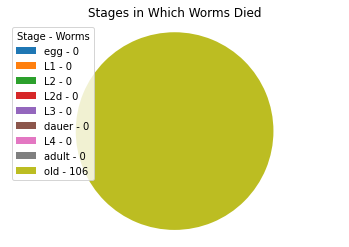

In [10]:
display(HTML("<style>div.output_scroll { height: 30em; }</style>"))
RG.frac_dead(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Average Time Spent Per Stage (hrs)
L1 13.12
L2 8.403
L2d 12.969
L3 8.376
dauer 13.611
L4 10.822
adult 46.387
old 49.902


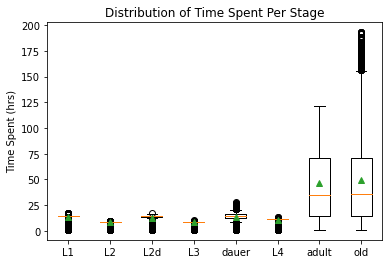

In [11]:
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
RG.stage_time(my_data[-1]["stage_list"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

In [12]:
def stats_d(time=0):
    RG.stats_d(my_data[time]["p_to_i"], my_data[time]["array"])

interact(stats_d, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

x axis limits include dauer genes from 18 - 35

In [13]:
def stats_s(time=0):
    RG.stats_s(my_data[time]["p_to_i"], my_data[time]["array"])

interact(stats_s, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=2), Output()), _dom_classes=('widget-interact…

x axis limits include smell genes from 0.25 - 0.75

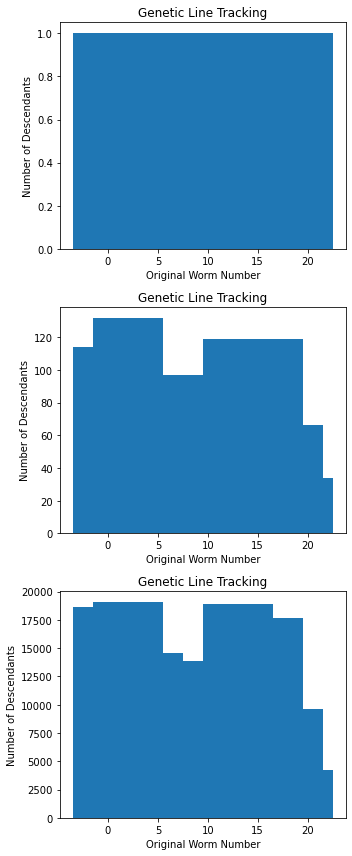

In [14]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.stats_g(my_data[i]["par"], my_data[i]["p_to_i"], my_data[i]["array"])
plt.tight_layout()

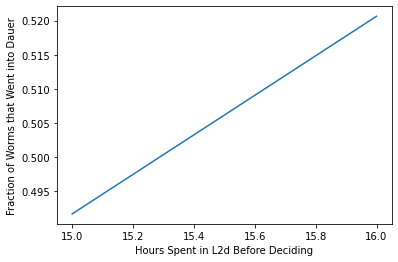

In [15]:
RG.frac_dauer(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

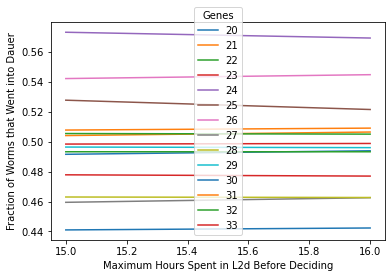

In [16]:
RG.frac_dauer_gene(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

only plot the genes that have fractions != 0

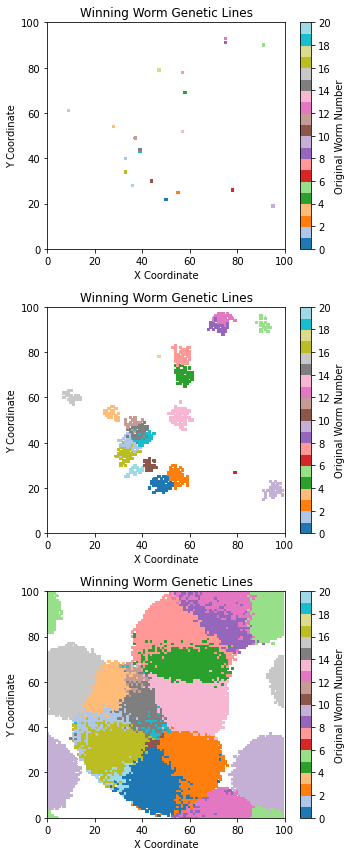

In [17]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.genetic_line_map(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

In [18]:
RG.dauer_line(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["s_to_i"], my_data[-1]["par"])

Fraction of Worm Descendants in Dauer (only genetic lines with more than 2042 living individuals)
Worm 0 : 0.02438631358435838
Worm 1 : 0.03379244074311339
Worm 2 : 0.022531963948857682
Worm 3 : 0.019518837948252384
Worm 4 : 0.023069550930996715
Worm 5 : 0.023310023310023312
Worm 7 : 0.03225806451612903
Worm 8 : 0.027000860585197933
Worm 9 : 0.025072420337628607
Worm 10 : 0.025157232704402517
Worm 11 : 0.03069873997709049
Worm 12 : 0.02943848809740142
Worm 13 : 0.02973918575063613
Worm 14 : 0.026983924470528196
Worm 15 : 0.024645717806531114
Worm 16 : 0.02193081618810762
Worm 18 : 0.027664683161081532
Worm 19 : 0.028805620608899296


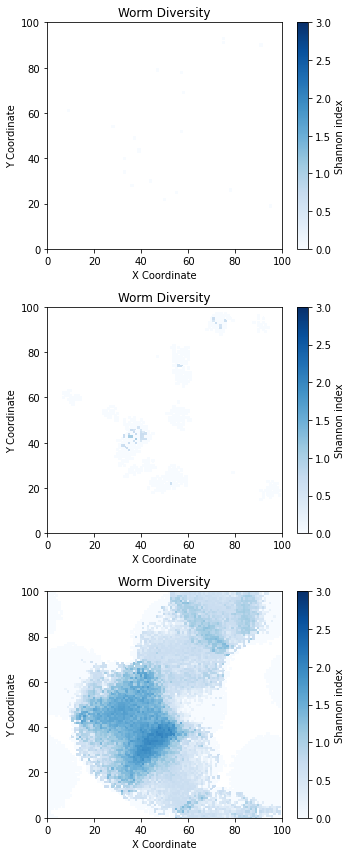

In [19]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.diversity(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

the limit of Shannon index values is from 0 to 4

In [20]:
RG.which_gen(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["par"])

This is generation number 8


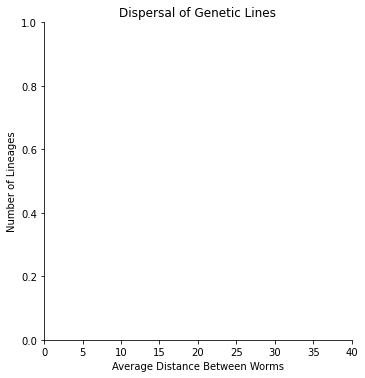

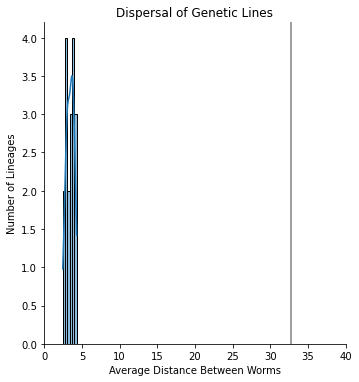

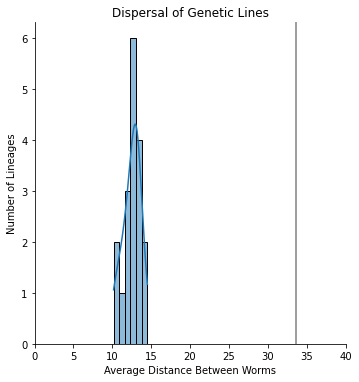

In [21]:
for i in range(len(time_saved)):
    RG.clump(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])

clumpiness of each lineage with more than 1% of living worms vs. clumpiness of a random sample of the population

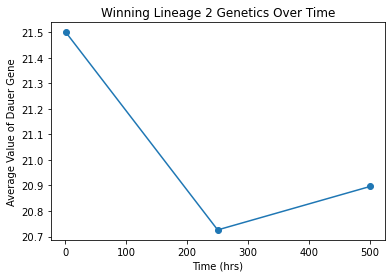

In [22]:
RG.dauer_over_time(save=time_saved)

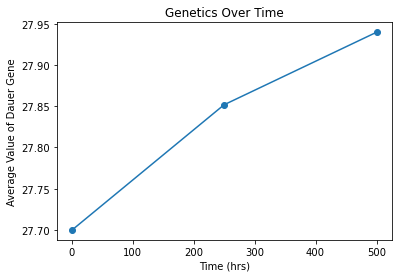

In [23]:
RG.all_dauer_over_time(save=time_saved)

In [24]:
winsound.Beep(1800,500)